# Лабораторная работа № 11
### "Пороговая обработка изображений"
<font size="4">Задание 5.1.
    
Для трех значений порога 70 + №, где № – номер по списку группы, провести пороговую обработку полутонового изображения с плавным изменением интенсивности. Номер по списку группы - 29.

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread ('jojo.jpg')
img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)

In [19]:
ret, thresh1 = cv2.threshold(img, 99,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 99,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 99,255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, 99,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 99,255, cv2.THRESH_TOZERO_INV)

In [20]:
title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

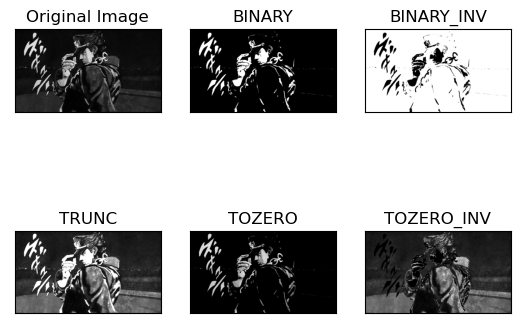

In [21]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<font size="4">Задание 5.2.
    
Протестировать функции с адаптивным порогом, задавая последовательно два значения порога, примерно 1/3 и 2/3 от максимума интенсивности. Проанализировать результат пороговой обработки изображения

In [22]:
img = cv2.imread('jojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)

In [23]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

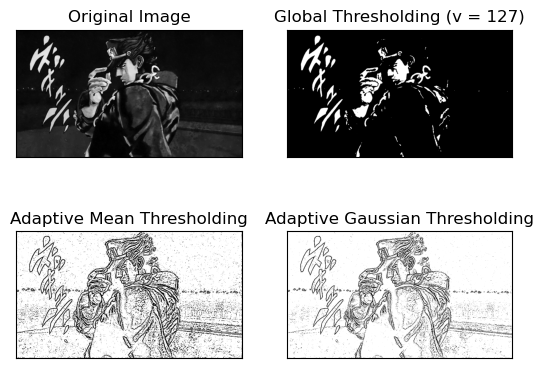

In [24]:
titles = ['Original Image', 'Global Thresholding (v = 127)', 
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<font size="4">Задание 5.3.

Загрузить модули cv2, random, PIL. Создать зашумленное изображение.

In [25]:
import random
from PIL import Image, ImageDraw

In [26]:
image = Image.open('jojo.jpg')
draw = ImageDraw.Draw(image) 

In [27]:
width = image.size[0]
height = image.size[1]
pix = image.load() 

In [28]:
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

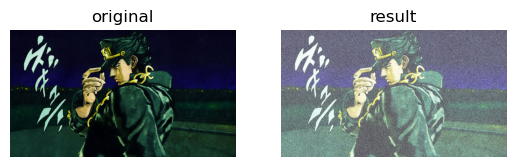

In [29]:
image.save("Newjojo.png", "JPEG")

imag = cv2.imread('jojo.jpg')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
img = cv2.imread('Newjojo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imag),plt.title('original')
plt.axis("off")
plt.subplot(122),plt.imshow(img),plt.title('result')
plt.axis("off")
plt.show()

<font size="4">Задание 5.4.

На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5x5, затем применяется пороговая обработка Оцу. Сделать анализ того, как фильтрация шума улучшает результат.

In [34]:
img = cv2.imread('jojo.jpg', 0)

In [35]:
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [36]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ["Original Noisy Image","Histogram","GlobalThresholding (v=127)",
          "Original Noisy Image", "Histogram","Otsu’s Thresholding",
          "Gaussian filtered Image","Histogram","Otsu’s Thresh-olding"]

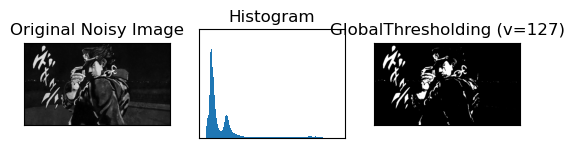

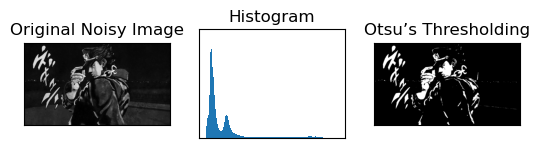

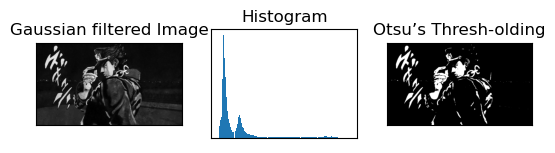

In [37]:
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], "gray")
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],"gray")
    plt.title(titles[i*3+2]), plt.xticks([]),plt.yticks([])
    plt.show()